# Ignacio Chaparro - 202220577 y Mateo López - 202220119

# Problema 1: Asignación de Tareas en un Equipo de Desarrollo Ágil

## Parte A:

### Problema identificado
Se busca resolver la mayor cantidad de Puntos de Prioridad* cumpliendo el límite de que no supere los 52 puntos de historia.

*Los Puntos de Prioridad se asignan a través de la siguiente conversión de prioridad textual a numérica:

|Prioridad|Numérica|
|---------|--------|
| Máxima | 21 |
| Alta | 13 |
| Media Alta | 8 |
| Media | 5 |
| Media baja | 3 |
| Baja | 2 |
| Mínima | 1 |

### Suposiciones para delimitar el modelo
- El máximo de puntos de historia realizados entre los n desarrolladores es igual o menor a 52
- Cada desarrollador tiene las capacidades de realizar cualquiera de las tareas
- Si hay 2 tareas con la misma cantidad de Puntos de Historia y misma prioridad, no hay diferencia en la solución si se selecciona una sobre la otra.

### Variable Clave

- **Variable de decisión** $x_i$ = {0, 1} donde la variable toma un valor de 1 en caso que tarea i sea seleccionada y 0 en caso contrario. $∀i ∈ 𝑇$

### Conjuntos
- $T = T_1, T_2, T_3, … , T_{11}$  
Representa el conjunto de las tareas.

### Parametros
- $𝑃ᵢ$ = puntos de Prioridad de cada Tarea $i,∀i ∈ T$
- $𝐻ᵢ$ = puntos de historia de cada Tarea $i,∀i ∈ T$
- $Hmax$ = Máximo de Puntos de Historia

### Relaciones
- Maximizar la cantidad de puntos de prioridad de las tareas seleccionadas

$$
max\sum_{i ∈ T} P_i x_i
$$
- La suma de todos los puntos de historia de las tareas seleccionadas debe ser menor o igual al máximo de puntos de historia

$$
\sum_{i \in T} H_i x_i \leq Hmax
$$

### Tipo de Modelo
Dado que es un problema cuya solución se modela como un vector de valores 0 o 1, y que esta solución maximiza la sumatoria de la multiplicación de dicho vector con el vector de valores de puntos de Prioridad, se puede afirmar que es un modelo lineal, estático y determinístico.


In [6]:
from pyomo.environ import *
#Parte A
model = ConcreteModel()
model.T= RangeSet(1,11)
H_MAX = 52
'''
conversion_prioridad= {
    "Maxima": 21,
    "Alta": 13,
    "Media Alta": 8,
    "Media": 5,
    "Media Baja": 3,
    "Baja": 2,
    "Minima": 1
}
'''
#Para cada llave de numero de tarea, se tiene una tupla (Puntos historia, Puntos Prioridad)
tareas = {
    1: (5,21),
    2: (3,8),
    3: (13,13),
    4: (1,3),
    5: (21,1),
    6: (2,5),
    7: (2,13),
    8: (5,13),
    9: (8,2),
    10: (13,21),
    11: (21,13)
}
model.x = Var ( model.T, domain= Binary )
#Funcion objetivo
model.obj = Objective(expr=sum(tareas[i][1]*model.x[i] for i in model.T), sense=maximize)

#Restricciones
model.tareas = ConstraintList()
model.tareas.add (sum(tareas[i][0]*model.x[i] for i in model.T)<=H_MAX)

from pyomo.opt import SolverFactory
solver = SolverFactory('glpk')
solver.solve(model)


print("Puntos de Prioridad Máximos:", model.obj())
print("Tareas seleccionadas:")
for i in model.T:
    if model.x[i].value == 1:
        print(f"Tarea {i} - Puntos de Historia: {tareas[i][0]}, Puntos prioridad: {tareas[i][1]}")
print(f"Puntos de Historia usados: {sum(tareas[i][0] * model.x[i].value for i in model.T)}")

Puntos de Prioridad Máximos: 99.0
Tareas seleccionadas:
Tarea 1 - Puntos de Historia: 5, Puntos prioridad: 21
Tarea 2 - Puntos de Historia: 3, Puntos prioridad: 8
Tarea 3 - Puntos de Historia: 13, Puntos prioridad: 13
Tarea 4 - Puntos de Historia: 1, Puntos prioridad: 3
Tarea 6 - Puntos de Historia: 2, Puntos prioridad: 5
Tarea 7 - Puntos de Historia: 2, Puntos prioridad: 13
Tarea 8 - Puntos de Historia: 5, Puntos prioridad: 13
Tarea 9 - Puntos de Historia: 8, Puntos prioridad: 2
Tarea 10 - Puntos de Historia: 13, Puntos prioridad: 21
Puntos de Historia usados: 52.0


## Visualización de resultados

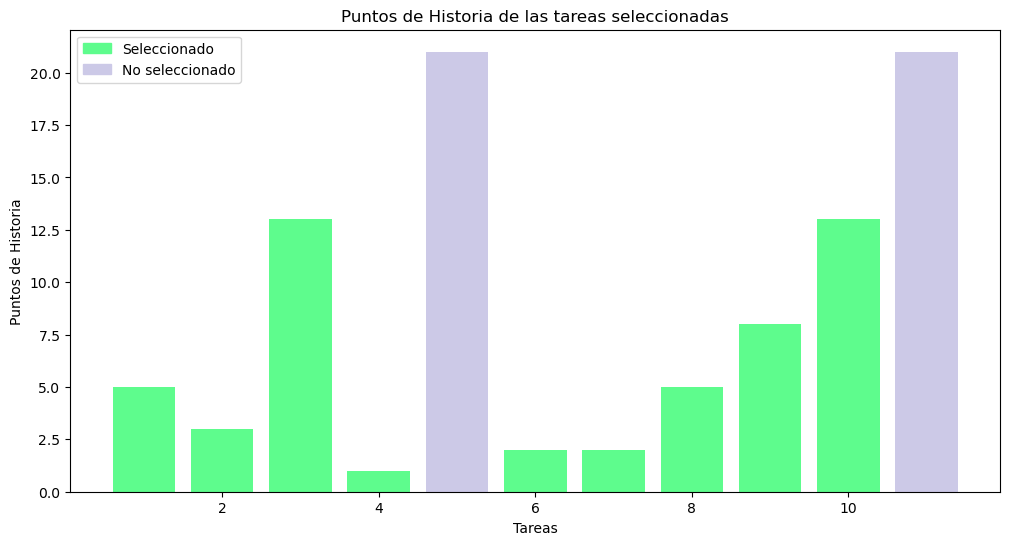

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
lista_tareas = list(model.T)
puntos_historia = [tareas[i][0] for i in lista_tareas]

plt.figure(figsize=(12, 6))
plt.bar(lista_tareas, puntos_historia, color=['#5EFC8D' if model.x[i].value == 1 else '#CCC9E7' for i in lista_tareas])

plt.xlabel("Tareas")
plt.ylabel("Puntos de Historia")
plt.title("Puntos de Historia de las tareas seleccionadas")

selected_patch = mpatches.Patch(color='#5EFC8D', label='Seleccionado')
unselected_patch = mpatches.Patch(color='#CCC9E7', label='No seleccionado')
plt.legend(handles=[selected_patch, unselected_patch])
plt.show()



## Parte B:
### Problema identificado
Se busca encontrar también las tareas que maximicen el número de Puntos de Prioridad, cumpliendo el límite de que las tareas no superen los 52 puntos de historia, y con la nueva restricción de que cada desarrollador no supere los 13 puntos de historia..

### Suposiciones para delimitar el modelo
- El máximo de puntos de historia realizados entre los 4 desarrolladores es igual o menor a 52
- Cada desarrollador tiene las capacidades de realizar cualquiera de las tareas, pero solo puede realizar tareas cuya suma de puntos de historia sea menor o igual a 13.
- Una tarea no puede ser realizada por 2 o más trabajadores.
- Si hay 2 tareas con la misma cantidad de Puntos de Historia y misma prioridad, no hay diferencia en la solución si se selecciona una sobre la otra.

### Variables Clave

- **Variable de decisión** $x_{i,q}$ = {0, 1} donde la variable toma un valor de 1 en caso que *el desarrollador q* sea seleccionado para hacer la tarea i y 0 en caso contrario. $∀i ∈ 𝑇$


### Conjuntos
- $T = T_1, T_2, T_3, … , T_{11}$  
Representa el conjunto de las tareas.
- $Q = Q_1, Q_2, Q_3, … , Q_{m}$  
Representa el conjunto de desarrolladores.


### Parametros
- $𝑃ᵢ$ = puntos de Prioridad de cada Tarea $i,∀i ∈ T$
- $𝐻ᵢ$ = puntos de historia de cada Tarea $i,∀i ∈ T$
- $Hmax$ = Máximo de Puntos de Historia global
- $Dmax$ = Máximo de Puntos de Historia por trabajador (asumiendo que todos los trabajadores comparten el mismo máximo)

### Relaciones
- Maximizar la cantidad de puntos de prioridad de las tareas seleccionadas por los q trabajadores

$$
max(\sum_{q\in Q} \sum_{i ∈ T} P_i*x_{i,q} )
$$
- La suma de todos los puntos de historia de las tareas seleccionadas por un deszarrollador m debe ser menor o igual al máximo de puntos de historia por trabajador

$$
\sum_{i \in T} H_i*x_{i,m} \leq D_{\max}, \quad \forall m \in Q
$$

- La totalidad de la suma de todos los puntos de historia de las tareas seleccionadas por los 4 trabajadores debe ser menor o igual al máximo de puntos de historia global

$$
\sum_{q\in Q}\sum_{i ∈ T} H_i*x_{i,q}  \leq H_{\max}
$$
- Una tarea no puede ser desarrollada por más de un desarrollador
$$
\sum_{q\in Q}x_{i,q}  \leq 1  \quad  \forall i \in T
$$
### Tipo de Modelo
Dado que es un problema cuya solución se modela como un vector de valores 0 o 1, y que esta solución maximiza la sumatoria de la multiplicación de dicho vector con el vector de valores de puntos de Prioridad, se puede afirmar que es un modelo lineal, estático y determinístico.

In [14]:
from pyomo.environ import *
#Parte B
modelo = ConcreteModel()


H_MAX = 52
D_MAX = 13
N_EMPLEADOS = 4
modelo.T= RangeSet(1,11)
modelo.Q = RangeSet(N_EMPLEADOS)
'''
conversion_prioridad= {
    "Maxima": 21,
    "Alta": 13,
    "Media Alta": 8,
    "Media": 5,
    "Media Baja": 3,
    "Baja": 2,
    "Minima": 1
}
'''
#Para cada llave de numero de tarea, se tiene una tupla (Puntos historia, Puntos Prioridad)
tareas = {
    1: (5,21),
    2: (3,8),
    3: (13,13),
    4: (1,3),
    5: (21,1),
    6: (2,5),
    7: (2,13),
    8: (5,13),
    9: (8,2),
    10: (13,21),
    11: (21,13)
}
modelo.x = Var ( modelo.T,modelo.Q, domain= Binary )
modelo.obj = Objective(expr=sum(sum(tareas[i][1]*modelo.x[i,q] for i in modelo.T) for q in modelo.Q), sense=maximize)
#Restrictions
modelo.rest = ConstraintList()
for q in modelo.Q:
    modelo.rest.add(sum(tareas[t][0]*modelo.x[t,q] for t in modelo.T) <=D_MAX)
modelo.rest.add (sum(sum(tareas[i][0]*modelo.x[i,q] for i in modelo.T) for q in modelo.Q)<=H_MAX)
for t in modelo.T:
    modelo.rest.add(sum(modelo.x[t,q] for q in modelo.Q) <=1)
from pyomo.opt import SolverFactory
solver = SolverFactory('glpk')
solver.solve(modelo)

print("Prioridad máxima:", modelo.obj())
print("Distribución de tareas:")
for q in modelo.Q:
    print("Desarrollador ",q,":")
    for i in modelo.T:
        if modelo.x[i, q].value == 1:
            print(f"Tarea {i} - Puntos de Historia: {tareas[i][0]}, Puntos de Prioridad: {tareas[i][1]}")
    print(f"Total de Puntos de Historia para el desarrollador {q}: {sum(tareas[i][0] * modelo.x[i, q].value for i in modelo.T)}")
    print(f"Total de Puntos de Prioridad para el desarrollador {q}: {sum(tareas[i][1] * modelo.x[i, q].value for i in modelo.T)}")

print(f"\n Totalidad de puntos de Historia usados: {sum(tareas[i][0] * modelo.x[i, q].value for i in modelo.T for q in modelo.Q)}")

Prioridad máxima: 99.0
Distribución de tareas:
Desarrollador  1 :
Tarea 1 - Puntos de Historia: 5, Puntos de Prioridad: 21
Tarea 2 - Puntos de Historia: 3, Puntos de Prioridad: 8
Tarea 8 - Puntos de Historia: 5, Puntos de Prioridad: 13
Total de Puntos de Historia para el desarrollador 1: 13.0
Total de Puntos de Prioridad para el desarrollador 1: 42.0
Desarrollador  2 :
Tarea 10 - Puntos de Historia: 13, Puntos de Prioridad: 21
Total de Puntos de Historia para el desarrollador 2: 13.0
Total de Puntos de Prioridad para el desarrollador 2: 21.0
Desarrollador  3 :
Tarea 3 - Puntos de Historia: 13, Puntos de Prioridad: 13
Total de Puntos de Historia para el desarrollador 3: 13.0
Total de Puntos de Prioridad para el desarrollador 3: 13.0
Desarrollador  4 :
Tarea 4 - Puntos de Historia: 1, Puntos de Prioridad: 3
Tarea 6 - Puntos de Historia: 2, Puntos de Prioridad: 5
Tarea 7 - Puntos de Historia: 2, Puntos de Prioridad: 13
Tarea 9 - Puntos de Historia: 8, Puntos de Prioridad: 2
Total de Punto

## Visualización de resultados

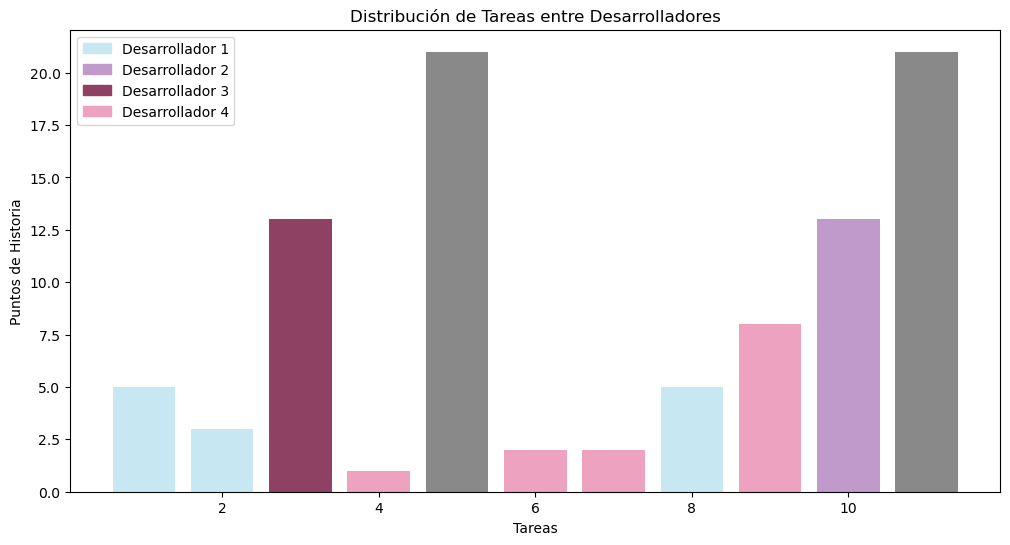

In [13]:

lista_tareas = list(modelo.T)
pntos_historia = [tareas[i][0] for i in lista_tareas]

desarrolladores = list(modelo.Q)
color_map = {
    desarrolladores[0]: "#C7E8F3",  
    desarrolladores[1]: "#BF9ACA",  
    desarrolladores[2]: "#8E4162",  
    desarrolladores[3]: "#EDA2C0"  
}
task_colors = []
color_desarrolladores = [] 

for i in lista_tareas:
    assigned_dev = None
    for q in desarrolladores:
        if modelo.x[i, q].value == 1:  
            assigned_dev = q  
            break
    if assigned_dev is not None:
        task_colors.append(color_map[assigned_dev])
        color_desarrolladores.append(assigned_dev)
    else:
        task_colors.append("#898989") 
        color_desarrolladores.append(None)

plt.figure(figsize=(12, 6))
plt.bar(lista_tareas, pntos_historia, color=task_colors)

plt.xlabel("Tareas")
plt.ylabel("Puntos de Historia")
plt.title("Distribución de Tareas entre Desarrolladores")

legend_patches = [mpatches.Patch(color=color_map[q], label=f"Desarrollador {q}") for q in desarrolladores]
plt.legend(handles=legend_patches)

plt.show()


# Problema 2: Asignación de Trabajos a Trabajadores

## Parte A:

### Problema identificado
Se busca asignarle a cada uno de los 3 trabajadores uno o más trabajos tal que maximicen sus ganancias, sin embargo manteniéndose bajo el limite de horas que tiene cada uno.


### Suposiciones para delimitar el modelo
- No se pueden repetir los mismos trabajos entre diferentes trabajadores.
- Cada trabajador tiene las capacidades de realizar cualquiera de los trabajos con el mismo desempeño que los otros.
- Como se afirma que la realización de las tareas es independiente para los 3 trabajadores (afirmación 1), se puede suponer que el valor máximo de la suma de ganancias de los 3 trabajadores (máximo global) se obtiene con el máximo de las ganancias que cada uno de los 3 trabajadores puede obtener (máximo local).


### Variable Clave

- **Variable de decisión** $x_{i,d}$ = {0, 1} donde la variable toma un valor de 1 en caso que el trabajador d seleccione el trabajo i y 0 en caso contrario. $∀i ∈ 𝑇$

### Conjuntos
- $T = T_1, T_2, T_3, T_4, T_5$  
Representa el conjunto de los trabajos posibles.
- $O = O_1, O_2, O_3, ..., O_n$  
Representa el conjunto de los trabajadores.

### Parametros
- $Tᵢ$ = Tiempo en horas que toma realizar la tarea $i,∀i ∈ T$
- $Gᵢ$ = Ganancia en dólares que se obtienen al realizar la tarea $i,∀i ∈ T$
- $H_t$ = Máximo de horas que puede realizar el trabajador $t, t\in {O}$

### Relaciones
- Maximizar la ganancia de los ${n}$ trabajadores al seleccionar trabajos
$$
max(\sum_{o \in O}\sum_{i ∈ T} G_i*x_{i,o})
$$
- Limitar los trabajos de cada trabajador a que no superen sus máximos de horas
$$
\sum_{i ∈ T} T_i*x_{i,t} \le H_t, ∀t \in {O}
$$
- Un trabajo no puede ser realizado por más de un trabajador
$$
\sum_{o\in O}x_{i,o}  \leq 1  \quad  \forall i \in T
$$


In [16]:
from pyomo.environ import *
#Parte A
modelo2a = ConcreteModel()
N_TRABAJADORES = 3
N_TRABAJOS = 5
modelo2a.T= RangeSet(N_TRABAJOS)
modelo2a.O = RangeSet(N_TRABAJADORES)
modelo2a.x = Var ( modelo2a.T,modelo2a.O, domain= Binary )
""
disponibilidad_trabajadores = {
    1:8,
    2:10,
    3:6
}
#Cada trabajo está guardado con una tupla (ganancia USD, horas que requiere)
trabajos = {
    1: (50,4),
    2: (60,5),
    3: (40,3),
    4: (70,6),
    5: (30,2),
}
modelo2a.obj = Objective(expr=sum(sum(trabajos[t][0]*modelo2a.x[t,o] for t in modelo2a.T) for o in modelo2a.O), sense=maximize)

modelo2a.restrictions = ConstraintList()
for trabajador in modelo2a.O:
    modelo2a.restrictions.add(sum(trabajos[t][1]*modelo2a.x[t,trabajador] for t in modelo2a.T) <=disponibilidad_trabajadores[trabajador])
for trabajo in modelo2a.T:
    modelo2a.restrictions.add(sum(modelo2a.x[trabajo,o] for o in modelo2a.O) <=1)
from pyomo.opt import SolverFactory
solver = SolverFactory('glpk')
solver.solve(modelo2a) 

print("Ganancia en dólares máxima:", modelo2a.obj())
print("Distribución de tareas:")
for trabajador in modelo2a.O:
    print(f"Trabajador {trabajador}:")
    for a in modelo2a.T:
        if modelo2a.x[a,trabajador].value ==1:
            print(f"Tarea {a} - tiempo:{trabajos[a][1]}, ganancia:${trabajos[a][0]}")
    print(f"Total de horas completadas por el trabajador {trabajador}: {sum(trabajos[a][1]*modelo2a.x[a,trabajador].value for a in modelo2a.T)}")



Ganancia en dólares máxima: 250.0
Distribución de tareas:
Trabajador 1:
Tarea 1 - tiempo:4, ganancia:$50
Tarea 5 - tiempo:2, ganancia:$30
Total de horas completadas por el trabajador 1: 6.0
Trabajador 2:
Tarea 2 - tiempo:5, ganancia:$60
Tarea 3 - tiempo:3, ganancia:$40
Total de horas completadas por el trabajador 2: 8.0
Trabajador 3:
Tarea 4 - tiempo:6, ganancia:$70
Total de horas completadas por el trabajador 3: 6.0


## Visualización de resultados

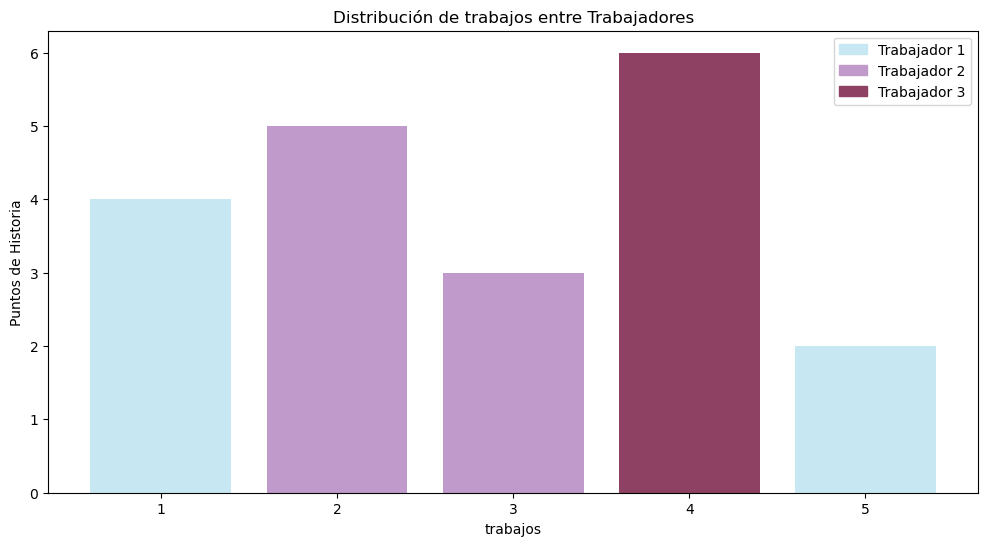

In [20]:

lista_trabajos = list(modelo2a.T)
horas_trabajo = [trabajos[i][1] for i in lista_trabajos]

trabajadores = list(modelo2a.O)
color_map = {
    trabajadores[0]: "#C7E8F3",  
    trabajadores[1]: "#BF9ACA",  
    trabajadores[2]: "#8E4162",  
}
task_colors = []
color_trabajadores = [] 

for i in lista_trabajos:
    trabajador_asignado = None
    for q in trabajadores:
        if modelo2a.x[i, q].value == 1:  
            trabajador_asignado = q  
            break
    if trabajador_asignado is not None:
        task_colors.append(color_map[trabajador_asignado])
        color_trabajadores.append(trabajador_asignado)
    else:
        task_colors.append("#898989") 
        color_trabajadores.append(None)

plt.figure(figsize=(12, 6))
plt.bar(lista_trabajos, horas_trabajo, color=task_colors)

plt.xlabel("trabajos")
plt.ylabel("Puntos de Historia")
plt.title("Distribución de trabajos entre Trabajadores")

legend_patches = [mpatches.Patch(color=color_map[q], label=f"Trabajador {q}") for q in trabajadores]
plt.legend(handles=legend_patches)

plt.show()


## Parte B:
Para esta parte solo se necesitan modificar las relaciones para que tengan en cuenta las 2 restricciones nuevas:
- Solo el trabajador 1 puede realizar el Trabajo 1.
- El Trabajo 3 no puede ser realizado por el trabajador 2.

### Problema identificado
Se busca asignarle a cada uno de los 3 trabajadores uno o más trabajos tal que maximicen sus ganancias, sin embargo, manteniéndose bajo el limite de horas que tiene cada uno y las restricciones específicas que el enunciado ofrece sobre los trabajadores 1 y 2.


### Suposiciones para delimitar el modelo
- No se pueden repetir trabajos entre distintos trabajadores.
- Cada trabajador tiene las capacidades de realizar cualquiera de los trabajos con el mismo desempeño que los otros.
- Como se afirma que la realización de las tareas es independiente para los 3 trabajadores (afirmación 1), se puede suponer que el valor máximo de la suma de ganancias de los 3 trabajadores (máximo global) se obtiene con el máximo de las ganancias que cada uno de los 3 trabajadores puede obtener (máximo local).


### Variable Clave

- **Variable de decisión** $x_{i,d}$ = {0, 1} donde la variable toma un valor de 1 en caso que el trabajador d seleccione el trabajo i y 0 en caso contrario. $∀i ∈ 𝑇$

### Conjuntos
- $T = T_1, T_2, T_3, T_4, T_5$  
Representa el conjunto de los trabajos posibles.
- $O = O_1, O_2, O_3, ..., O_n$  
Representa el conjunto de los trabajadores.

### Parametros
- $Tᵢ$ = Tiempo en horas que toma realizar la tarea $i,∀i ∈ T$
- $Gᵢ$ = Ganancia en dólares que se obtienen al realizar la tarea $i,∀i ∈ T$
- $H_t$ = Máximo de horas que puede realizar el trabajador $t, t\in {O}$

### Relaciones
- Maximizar la ganancia de los ${n}$ trabajadores al seleccionar trabajos
$$
max(\sum_{o \in O}\sum_{i ∈ T} G_i*x_{i,o})
$$
- Limitar los trabajos de cada trabajador a que no superen sus máximos de horas
$$
\sum_{i ∈ T} T_i*x_{i,t} \le H_t, ∀t \in {O}
$$
- Modelar las restricciones específicas: \
Para representar que solo el trabajador 1 puede hacer el trabajo 1, se modela que ninguno de los otros trabajadores puede hacer el trabajo 1:
$$
x_{T_1,m} = 0 \quad \forall m \in Q \setminus \{1\}
$$
Para representar que solo el trabajador 2 no puede realizar el trabajo 3:
$$
x_{T_3,2} = 0
$$
- Un trabajo no puede ser realizado por más de un trabajador
$$
\sum_{o\in O}x_{i,o}  \leq 1  \quad  \forall i \in T
$$


In [ ]:
from pyomo.environ import *
#Parte B
modelo2b = ConcreteModel()
N_TRABAJADORES = 3
N_TRABAJOS = 5
modelo2b.T= RangeSet(N_TRABAJOS)
modelo2b.O = RangeSet(N_TRABAJADORES)
modelo2b.x = Var ( modelo2b.T,modelo2b.O, domain= Binary )
""
disponibilidad_trabajadores = {
    1:8,
    2:10,
    3:6
}
trabajos = {
    1: (50,4),
    2: (60,5),
    3: (40,3),
    4: (70,6),
    5: (30,2),
}
modelo2b.obj = Objective(expr=sum(sum(trabajos[t][0]*modelo2b.x[t,o] for t in modelo2b.T) for o in modelo2b.O), sense=maximize)

modelo2b.restrictions = ConstraintList()
#Restricciones extra de la parte B
modelo2b.restrictions.add(modelo2b.x[3,2] == 0)
for trabajador in modelo2b.O:
    if trabajador!=1:
        modelo2b.restrictions.add(modelo2b.x[1,trabajador] == 0)
for trabajador in modelo2b.O:
    modelo2b.restrictions.add(sum(trabajos[t][1]*modelo2b.x[t,trabajador] for t in modelo2b.T) <=disponibilidad_trabajadores[trabajador])
for trabajo in modelo2b.T:
    modelo2b.restrictions.add(sum(modelo2b.x[trabajo,o] for o in modelo2b.O) <=1)
from pyomo.opt import SolverFactory
solver = SolverFactory('glpk')
solver.solve(modelo2b) 

print("Ganancia en dólares total obtenida:", modelo2b.obj())
print("Distribución de tareas:")
for trabajador in modelo2b.O:
    print(f"Trabajador {trabajador}:")
    for a in modelo2b.T:
        if modelo2b.x[a,trabajador].value ==1:
            print(f"Tarea {a} - tiempo:{trabajos[a][1]}, ganancia:${trabajos[a][0]}")
    print(f"Total de horas completadas por el trabajador {trabajador}: {sum(trabajos[a][1]*modelo2b.x[a,trabajador].value for a in modelo2b.T)}")


Ganancia en dólares máxima: 250.0
Distribución de tareas:
Trabajador 1:
Tarea 1 - tiempo:4, ganancia:$50
Tarea 3 - tiempo:3, ganancia:$40
Total de horas completadas por el trabajador 1: 7.0
Trabajador 2:
Tarea 2 - tiempo:5, ganancia:$60
Tarea 5 - tiempo:2, ganancia:$30
Total de horas completadas por el trabajador 2: 7.0
Trabajador 3:
Tarea 4 - tiempo:6, ganancia:$70
Total de horas completadas por el trabajador 3: 6.0


## Visualización de resultados

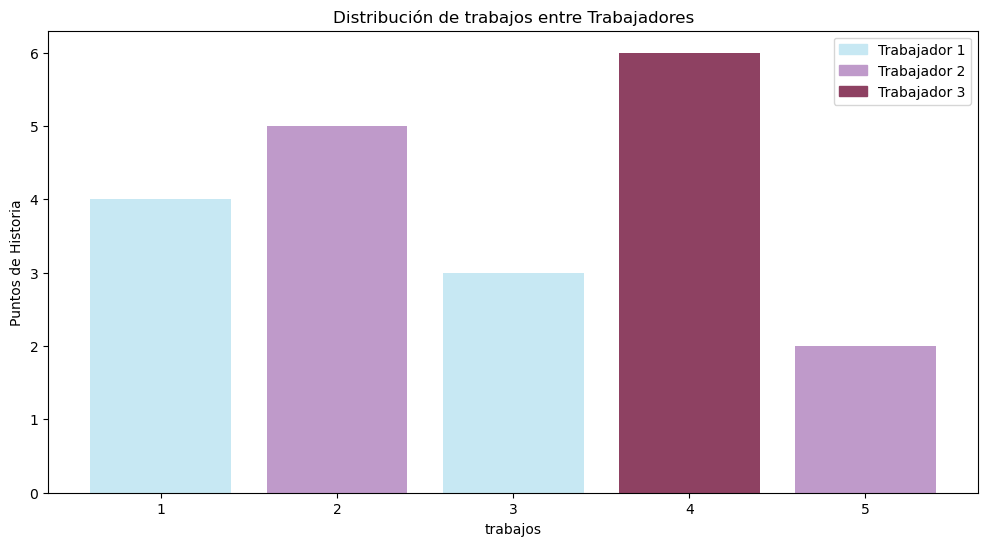

In [22]:

lista_trabajos = list(modelo2b.T)
horas_trabajo = [trabajos[i][1] for i in lista_trabajos]

trabajadores = list(modelo2b.O)
color_map = {
    trabajadores[0]: "#C7E8F3",  
    trabajadores[1]: "#BF9ACA",  
    trabajadores[2]: "#8E4162",  
}
task_colors = []
color_trabajadores = [] 

for i in lista_trabajos:
    trabajador_asignado = None
    for q in trabajadores:
        if modelo2b.x[i, q].value == 1:  
            trabajador_asignado = q  
            break
    if trabajador_asignado is not None:
        task_colors.append(color_map[trabajador_asignado])
        color_trabajadores.append(trabajador_asignado)
    else:
        task_colors.append("#898989") 
        color_trabajadores.append(None)

plt.figure(figsize=(12, 6))
plt.bar(lista_trabajos, horas_trabajo, color=task_colors)

plt.xlabel("trabajos")
plt.ylabel("Puntos de Historia")
plt.title("Distribución de trabajos entre Trabajadores")

legend_patches = [mpatches.Patch(color=color_map[q], label=f"Trabajador {q}") for q in trabajadores]
plt.legend(handles=legend_patches)

plt.show()

Se puede contrastar este gráfico con el del punto 2.a, donde el trabajo 3 se realizaba por el trabajador 2. Ahora, con la nueva restricción, se cambia la asignación de trabajos a una donde el trabajador 1 realiza los trabajos 1 y 3, y el trabajador 2 realiza el 2 y el 5. El trabajador 3 no fue afectado

# Problema 3: : Misión Humanitaria en Zambia

## Identificación del problema:
Se busca que cada avión maximice el valor  en recursos transportados, manteniendo los limites de volumen y peso de cada uno de los aviones, además de cumplir con las restricciones específicas del enunciado.

## Suposiciones para delimitar el modelo
- La cantidad de recursos en cada avion debe ser inferior a la capacidad de peso y volumen de este mismo.
- Los recursos solo pueden ser cargados por un solo avion.
- Las medicinas no pueden ser transportadas en el Avion 1
- Los equipos medicos y el agua potable no pueden viajar en el mismo avion.
- A excepción de las medicinas, los equipos medicos y el agua potable, los demas recursos pueden viajar en cualquiera de los aviones.

## Variables Clave
- **Variable de decisión** $x_{i,j}$ = {0, 1} donde la variable toma un valor de 1 en caso que se decida transportar el recurso $i$ en el avion $j$, y un valor de 0 en caso contrario $∀i ∈ R$ y $∀j ∈ A$

## Conjuntos
- $R = R_1, R_2, R_3, R_4, R_5$

  Representando cada uno de los recursos posibles a transportar siguendo la siguiente organización.

| Recurso            | Representación |
|--------------------|--------|
| Alimentos Básicos | $R_1$   |
| Medicinas         | $R_2$   |
| Equipos Médicos   | $R_3$   |
| Agua Potable      | $R_4$   |
| Mantas            | $R_5$   |

- $A = A_1, A_2, A_3, …, A_n$

  Representando cada uno de los aviones.

## Parámetros
- $P_i$ = Peso en toneladas del recurso $i$, $∀i ∈ R$
- $V_i$ = Volumen en $m^3$ del recurso $i$, $∀i ∈ R$
- $Val_i$ = Valor en dolares del recurso $i$, $∀i ∈ R$
- $CapP$ = Capacidad de peso en toneladas del avion $j$, $∀j ∈ A$
- $CapV$ = Capacidad de volumen en $m^3$ del avion $j$, $∀j ∈ A$

## Relaciones
- Maximizar el valor en recursos que cada avion transporte
$$
max(\sum_{i ∈ R} \sum_{j ∈ A} V_i *x_{i,j})
$$

- Limitar los recursos de un avion para que no superen la capacidad maxima de peso

$$
\sum_{i ∈ R} P_i*x_{i,j} ≤ CapP_j, ∀j ∈ A
$$

- Limitar los recursos de un avion para que no superen la capacidad maxima de volumen

$$
\sum_{i ∈ R} V_i*x_{i,j} ≤ CapV_j, ∀j ∈ A
$$

- Modelar las restricciones especificas

  Los medicamentos no pueden viajar en el avion 1

  $$x_{R_2,1} = 0$$

  Equipos medicos y agua potable no pueden viajar juntos
  $$
  (x_{R_3,j} = 1 ∧ x_{R_4,j} = 0) ∨ (x_{R_3,j} = 0 ∧ x_{R_4,j} = 1), j∈A
  $$